In [14]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [15]:
#fetching the dataset
df = pd.read_csv("Stock Market.csv")
df.index = pd.to_datetime(df.Date)
df.tail()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,,
1991-02-15,1991-02-15,220.0,220.0,220.0,220.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
1991-02-08,1991-02-08,225.0,225.0,225.0,225.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
1991-02-07,1991-02-07,225.0,225.0,225.0,225.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
1991-01-31,1991-01-31,225.0,230.0,225.0,230.0,0.0,0.0,0.0,0.0,NaN,NaN,5.0,5.0
1991-01-25,1991-01-25,240.0,240.0,210.0,210.0,0.0,0.0,0.0,0.0,NaN,NaN,30.0,-30.0


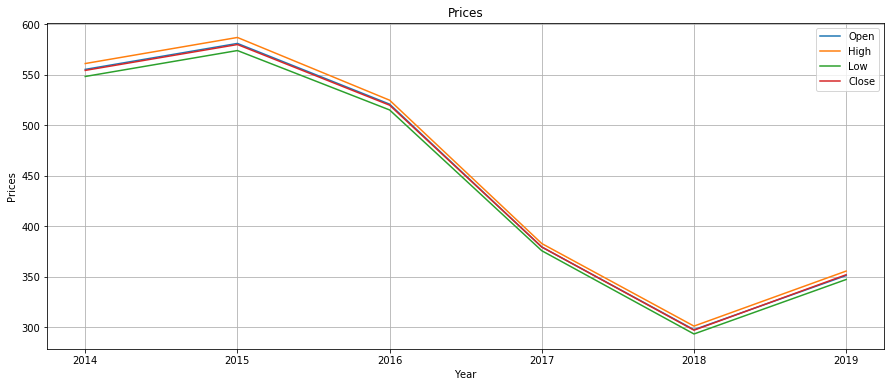

In [20]:
prices = df.loc[:,['Open','High','Low','Close']]
prices = prices.groupby(prices.index.year).mean()
prices = prices[prices.index >= 2014]
prices
prices.plot(title = 'Prices',figsize=(15,6))
plt.grid(True)
plt.xlabel('Year');
plt.ylabel('Prices');

The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable. 

In [56]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
        

In [42]:
#splitting into train and test 
train = new_data[5037:6023]
test = new_data[6023:]

While splitting the data, I have set the last 2 year's data into test and the 4 year's data before that into train.

In [48]:
train.shape, test.shape

((986, 2), (285, 2))

In [49]:
#make predictions for the test dataset and check the RMSE using the actual values.
preds = []
for i in range(0,285):
    a = train['Close'][len(train)-285+i:].sum() + sum(preds)
    b = a/285
    preds.append(b)
    
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(test['Close'])-preds),2)))
rms    

61.20712003741086

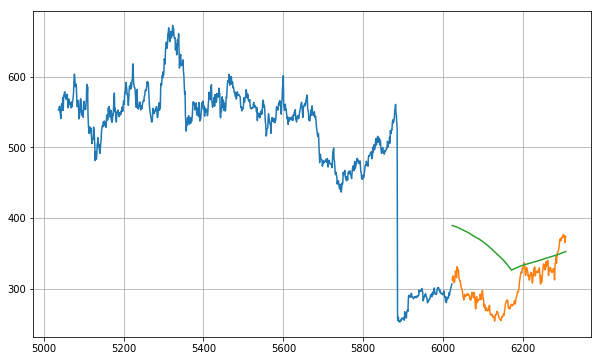

In [58]:
#plotting the predicted value
#test['Predictions'] = 0
test['Predictions'] = preds
train=train['Close']
train.plot(figsize=(10,6))
plt.plot(test[['Close','Predictions']])
plt.grid(True)